# Notebook 4: Creating 2D Histograms

This script shows how to

- make 2D histograms
- save them as Paicos data
- read the Paicos data file
- plot the data from the file


## Making a 2D histogram

In [16]:
import paicos as pa
import numpy as np

# A snapshot object
snap = pa.Snapshot(pa.data_dir, 247, load_catalog=False)

We can check the `Histogram2D` doc string for details on the options

In [15]:
pa.Histogram2D?

Init signature:
pa.Histogram2D(
    snap,
    x,
    y,
    weights=None,
    bins_x=200,
    bins_y=200,
    normalize=True,
    logscale=True,
)
Docstring:     
This code defines a Histogram2D class which can be used to create 2D
histograms. The class takes in the bin edges for the x and y axes, and an
optional argument to indicate if the histogram should be in log scale. The
class has methods to calculate the bin edges and centers, remove astro
units, and create the histogram with a specific normalization. It also has
a method to generate a color label for the histogram with units.
Init docstring:
Initialize the Histogram2D class with the bin edges for the x
and y axes, and an optional argument to indicate if the
histogram should be in log scale.

Parameters:
    snap (Snapshot): the input snapshot

    x (array): The x data for the histogram

    y (array): The y data for the histogram

    weights (array): The weight data for the histogram, default
                     is None

  

Here we call the `Histogram2D` class.  We start with a
2D histogram of the density/magnetic field phase space (note that this low resolution simulation is not converged in magnetic field strength).

In [3]:
# Create histogram
rhoB = pa.Histogram2D(snap, '0_Density', '0_MagneticFieldStrength', weights='0_Masses', bins_x=200,
                      bins_y=200, logscale=True)


Attempting to get derived variable: 0_MagneticFieldStrength...	[DONE]



#### Calling get_colorlabel

This is a method to generate a color label for the histogram which includes units.

In [4]:

# Create colorlabel
colorlabel = rhoB.get_colorlabel(r'\rho', 'B', 'M')

## Plotting the histogram


We are now ready to make a plot.

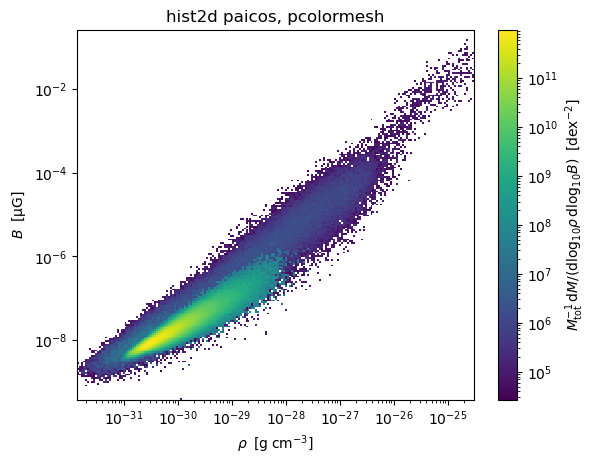

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Make a quick plot
plt.figure(1)
plt.clf()

# Convert to physical and some sensible units
xvals = rhoB.centers_x.to_physical.to('g/cm3')  # xvals = rhoB.centers_x would give comoving code units.
yvals = rhoB.centers_y.to_physical.to('uG') # yvals = rhoB.centers_y would give comoving code units.

plt.pcolormesh(xvals.value, yvals.value,
               rhoB.hist2d.value, norm=LogNorm())
plt.xlabel(xvals.label('\\rho'))
plt.ylabel(yvals.label('B'))

plt.title('paicos Histogram2D')
if rhoB.logscale:
    plt.xscale('log')
    plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label(rhoB.colorlabel)
plt.title('hist2d paicos, pcolormesh')
plt.show()

#### Example: Density vs temperature histogram
Let's do a Density vs Temperature plot as well

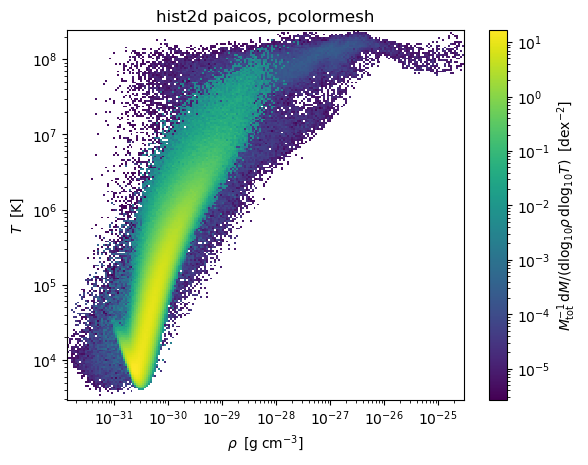

In [7]:
# Create histogram
rhoT = pa.Histogram2D(snap, '0_Density', '0_Temperatures', weights='0_Masses', bins_x=200,
                      bins_y=200, logscale=True)

# Create colorlabel
colorlabel = rhoT.get_colorlabel(r'\rho', 'T', 'M')

# Convert to physical and some sensible units
xvals = rhoT.centers_x.to_physical.to('g/cm3')  # xvals = hist.centers_x would give comoving code units.
yvals = rhoT.centers_y

# Make a quick plot
plt.figure(1)
plt.clf()

plt.pcolormesh(xvals.value, yvals.value,
               rhoT.hist2d.value, norm=LogNorm())
plt.xlabel(xvals.label('\\rho'))
plt.ylabel(yvals.label('T'))

plt.title('paicos Histogram2D')
if rhoT.logscale:
    plt.xscale('log')
    plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label(rhoT.colorlabel)
plt.title('hist2d paicos, pcolormesh')
plt.show()

## Saving a rhoTogram



Here we save the Temperature-Density 2D histogram we made.
We use the `save` method.

In [8]:
# Save the histogram
rhoT.save(basedir=pa.data_dir, basename='rhoT_hist')

## Loading and plotting a 2D histogram


We can load the 2d histogram data using the `Histogram2DReader` class. 

In [10]:
# Load the histogram
rhoT_loaded = pa.Histogram2DReader(pa.data_dir, 247, basename='rhoT_hist')

We then plot it again, restoring the units and colorlabel.

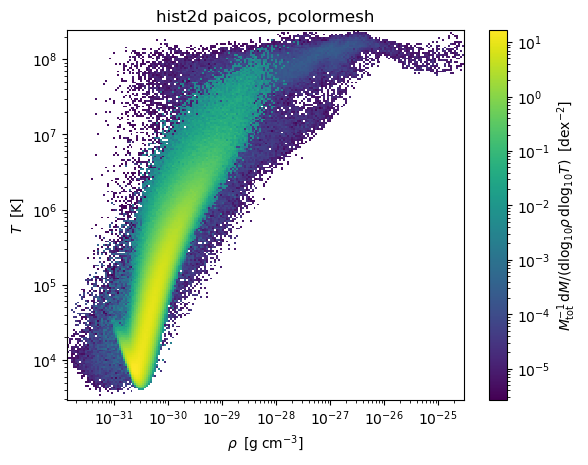

In [13]:
### Copy-pasted plotting code from the other script

plt.figure(1)
plt.clf()

# Convert to physical and some sensible units
xvals = rhoT_loaded.centers_x.to_physical.to('g cm^-3')
yvals = rhoT_loaded.centers_y

plt.pcolormesh(xvals.value, yvals.value,
               rhoT_loaded.hist2d.value, norm=LogNorm())
plt.xlabel(xvals.label('\\rho'))
plt.ylabel(yvals.label('T'))

plt.title('paicos Histogram2D')
if rhoT_loaded.logscale:
    plt.xscale('log')
    plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label(rhoT_loaded.colorlabel)
plt.title('hist2d paicos, pcolormesh')
plt.show()